In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
data = np.genfromtxt('data/advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:, :3]
y = data[:, 3:]

def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X-avg)/(maxi-mini)
    X_b = np.c_[np.ones((N, 1)), X]
    print(X_b)
    return X_b, maxi, mini, avg

X_b , maxi , mini , avg = mean_normalization(X)

[[ 1.00000000e+00  5.50426788e-01 -9.83586370e-02  7.57928475e-03]
 [ 1.00000000e+00 -7.57540486e-02 -9.32979082e-02 -7.37297571e-02]
 [ 1.00000000e+00 -1.67859312e-01 -7.10307018e-02  7.91666667e-03]
 [ 1.00000000e+00  2.85244602e-01 -8.65502699e-02 -2.85205803e-02]
 [ 1.00000000e+00  3.84097503e-01 -1.89451754e-01 -2.88579622e-02]
 [ 1.00000000e+00 -1.96536775e-01 -6.09092443e-02  2.71474359e-02]
 [ 1.00000000e+00 -3.18943995e-02 -1.15227733e-01 -1.46604251e-01]
 [ 1.00000000e+00  1.79644062e-01 -1.59762146e-01 -1.86752699e-01]
 [ 1.00000000e+00 -1.96874157e-01 -2.18803981e-01 -2.22515182e-01]
 [ 1.00000000e+00  4.48200067e-01 -2.17117072e-01 -1.54364035e-01]
 [ 1.00000000e+00 -2.87955466e-03 -2.06320850e-01 -1.44242578e-01]
 [ 1.00000000e+00  4.98469973e-01 -1.44917341e-01 -2.12393725e-01]
 [ 1.00000000e+00 -1.45592105e-01 -1.07467949e-01 -3.55431849e-03]
 [ 1.00000000e+00  1.03058367e-01 -2.00247976e-01 -2.01597503e-01]
 [ 1.00000000e+00  4.62707490e-01 -1.14890351e-01 -7.06933198e

Epoch 0, Loss [[130.13815551]]
Epoch 0, Loss [[78.84103654]]
Epoch 0, Loss [[125.11603204]]
Epoch 0, Loss [[7.58346188]]
Epoch 0, Loss [[85.69977676]]
Epoch 0, Loss [[170.0446308]]
Epoch 0, Loss [[46.42744096]]
Epoch 0, Loss [[5.92990834]]
Epoch 0, Loss [[6.01457685]]
Epoch 0, Loss [[43.01398312]]
Epoch 0, Loss [[17.00578285]]
Epoch 0, Loss [[117.74625081]]
Epoch 0, Loss [[52.77940422]]
Epoch 0, Loss [[5.26731337]]
Epoch 0, Loss [[50.02385113]]
Epoch 0, Loss [[81.62978326]]
Epoch 0, Loss [[27.68289961]]
Epoch 0, Loss [[11.72244716]]
Epoch 0, Loss [[3.25412725]]
Epoch 0, Loss [[35.35132277]]
Epoch 0, Loss [[54.87774288]]
Epoch 0, Loss [[28.60931948]]
Epoch 0, Loss [[27.98301028]]
Epoch 0, Loss [[21.80205908]]
Epoch 0, Loss [[143.27619138]]
Epoch 0, Loss [[113.92155289]]
Epoch 0, Loss [[128.36784916]]
Epoch 0, Loss [[26.46227712]]
Epoch 0, Loss [[92.96489021]]
Epoch 0, Loss [[9.03809634]]
Epoch 0, Loss [[155.03995272]]
Epoch 0, Loss [[4.10184205]]
Epoch 0, Loss [[69.7242654]]
Epoch 0, Lo

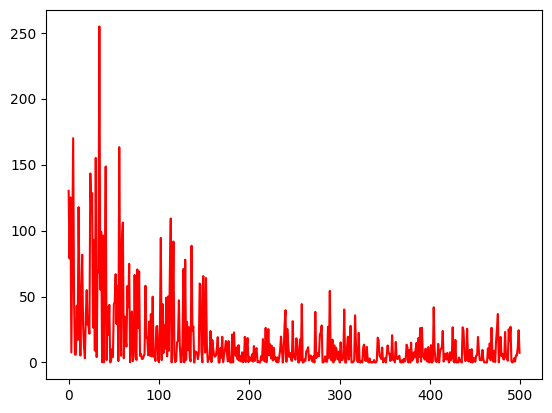

In [11]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):
    # thetas = np.random.randn(4, 1) # uncomment this line for real application
    thetas = np.asarray([[1.16270837] , [-0.81960489] , [1.39501033] , [0.29763545]])
    thetas_path = [thetas]
    losses = []
    
    for epoch in range(n_epochs):
        for i in range(N):
            # select a random number in N
            # random_index = np.random.randint(N)
            # in real application you should use this code
            random_index = np.random.randint(N)
            
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            # compute outpu
            y_hat = xi.dot(thetas)

            # compute loss li
            li = (y_hat - yi) * (y_hat - yi) / 2

            # compute gradient for loss
            gli = y_hat - yi

            # compute gradient
            gradient = xi.T.dot(gli)
            
            # update thetas
            thetas = thetas - learning_rate * gradient

            thetas_path.append(thetas)
            losses.append(li[0][0])

            # logging
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss {li}")
            
    return thetas_path, losses

sgd_theta , losses = stochastic_gradient_descent(X_b ,y ,n_epochs =50, learning_rate =0.01)
x_axis = list(range(500))
plt.plot(x_axis, losses[:500], color="r")
plt.show()


In [12]:
sgd_theta , losses = stochastic_gradient_descent ( X_b , y , n_epochs =1 , learning_rate
=0.01 )

print(np.sum(losses))

Epoch 0, Loss [[38.96215011]]
Epoch 0, Loss [[131.00903159]]
Epoch 0, Loss [[134.56821288]]
Epoch 0, Loss [[177.29937607]]
Epoch 0, Loss [[112.2373109]]
Epoch 0, Loss [[130.10074453]]
Epoch 0, Loss [[12.81940595]]
Epoch 0, Loss [[33.03661743]]
Epoch 0, Loss [[175.14611384]]
Epoch 0, Loss [[130.87286781]]
Epoch 0, Loss [[155.22690305]]
Epoch 0, Loss [[14.48899486]]
Epoch 0, Loss [[100.84848723]]
Epoch 0, Loss [[180.3393998]]
Epoch 0, Loss [[106.348857]]
Epoch 0, Loss [[6.03242223]]
Epoch 0, Loss [[81.46795136]]
Epoch 0, Loss [[6.93667299e-05]]
Epoch 0, Loss [[13.409302]]
Epoch 0, Loss [[9.49969065]]
Epoch 0, Loss [[238.04125608]]
Epoch 0, Loss [[124.81586268]]
Epoch 0, Loss [[112.81034375]]
Epoch 0, Loss [[47.87782095]]
Epoch 0, Loss [[220.15455612]]
Epoch 0, Loss [[4.57813507]]
Epoch 0, Loss [[22.29845424]]
Epoch 0, Loss [[58.90037743]]
Epoch 0, Loss [[63.89685163]]
Epoch 0, Loss [[75.22080916]]
Epoch 0, Loss [[105.44760894]]
Epoch 0, Loss [[83.73504281]]
Epoch 0, Loss [[71.84621618]]


### Mini-batch Gradient Descent

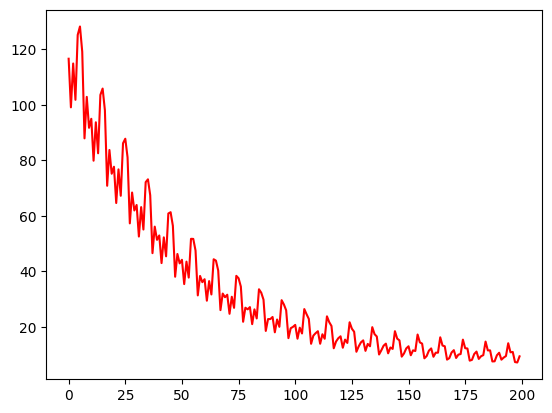

In [19]:
def mini_batch_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001, batch_size=10):
    thetas = np.asarray([[1.16270837] , [-0.81960489] , [1.39501033] , [0.29763545]])
    thetas_path = [thetas]
    losses = []
    
    for epoch in range(n_epochs):
        shuffled_indices = np.asarray ([21 , 144 , 17 , 107 , 37 , 115 , 167 , 31 , 3 ,
132 , 179 , 155 , 36 , 191 , 182 , 170 , 27 , 35 , 162 , 25 , 28 , 73 , 172 , 152 , 102 , 16 ,
185 , 11 , 1 , 34 , 177 , 29 , 96 , 22 , 76 , 196 , 6 , 128 , 114 , 117 , 111 , 43 , 57 , 126 ,
165 , 78 , 151 , 104 , 110 , 53 , 181 , 113 , 173 , 75 , 23 , 161 , 85 , 94 , 18 , 148 , 190 ,
169 , 149 , 79 , 138 , 20 , 108 , 137 , 93 , 192 , 198 , 153 , 4 , 45 , 164 , 26 , 8 , 131 ,
77 , 80 , 130 , 127 , 125 , 61 , 10 , 175 , 143 , 87 , 33 , 50 , 54 , 97 , 9 , 84 , 188 , 139 ,
195 , 72 , 64 , 194 , 44 , 109 , 112 , 60 , 86 , 90 , 140 , 171 , 59 , 199 , 105 , 41 , 147 ,
92 , 52 , 124 , 71 , 197 , 163 , 98 , 189 , 103 , 51 , 39 , 180 , 74 , 145 , 118 , 38 , 47 ,
174 , 100 , 184 , 183 , 160 , 69 , 91 , 82 , 42 , 89 , 81 , 186 , 136 , 63 , 157 , 46 , 67 ,
129 , 120 , 116 , 32 , 19 , 187 , 70 , 141 , 146 , 15 , 58 , 119 , 12 , 95 , 0 , 40 , 83 , 24 ,
168 , 150 , 178 , 49 , 159 , 7 , 193 , 48 , 30 , 14 , 121 , 5 , 142 , 65 , 176 , 101 , 55 ,
133 , 13 , 106 , 66 , 99 , 68 , 135 , 158 , 88 , 62 , 166 , 156 , 2 , 134 , 56 , 123 , 122 ,
154])
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, N, batch_size):
            xi = X_b_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            
            # compute output
            y_hat = xi.dot(thetas)
            
            # compute loss li
            li = (y_hat - yi) * (y_hat - yi) / 2
            
            # compute derivative of loss
            gli = (y_hat - yi) / batch_size
            
            # compute gradient
            gradient = xi.T.dot(gli)
            
            # update thetas
            thetas = thetas - learning_rate * gradient
            thetas_path.append(thetas)

            loss_mean = np.sum(li) / batch_size
            losses.append(loss_mean)
    
    return thetas_path, losses

mbgd_thetas , losses = mini_batch_gradient_descent(X_b, y, n_epochs =50, batch_size = 20, learning_rate =0.01)

x_axis = list(range(200))
plt.plot(x_axis, losses[:200], color="r")
plt.show()

In [22]:
mbgd_thetas , losses = mini_batch_gradient_descent(X_b,y,n_epochs =50,batch_size = 20,learning_rate =0.01)
print(round(sum(losses)))

8866


### Batch Gradient Descent

In [24]:
def batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.001):
    thetas = np.asarray([[1.16270837] , [-0.81960489] , [1.39501033] , [0.29763545]])
    thetas_path = [thetas]
    losses = []
    
    for epoch in range(n_epochs):
        # compute output
        y_hat = X_b.dot(thetas)
        
        # compute loss
        li = (y_hat - y) ** 2
        
        # compute derivative of loss
        gli = 2 * (y_hat - y) / N
        
        # compute gradient
        gradient = X_b.T.dot(gli)
        
        # update thetas
        thetas = thetas - learning_rate * gradient
        thetas_path.append(thetas)
        loss_mean = np.sum(li) / N
        losses.append(loss_mean)
    
    return thetas_path, losses

b_thetas , losses = batch_gradient_descent(X_b,y,n_epochs =50,learning_rate =0.01)


6716


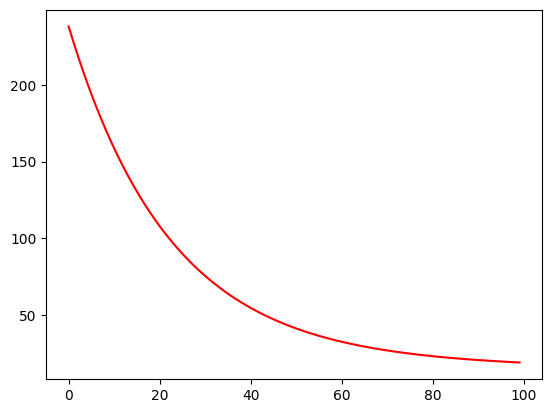

In [26]:
bgd_thetas, losses = batch_gradient_descent(X_b,y,n_epochs =100,learning_rate =0.01)
print(round(sum(losses)))
x_axis = list(range(100))
plt.plot(x_axis, losses[:100], color="r")
plt.show()

In [27]:
bgd_thetas ,losses = batch_gradient_descent(X_b, y, n_epochs =100, learning_rate=0.01)
print(round(sum(losses)))

6716
